<a href="https://colab.research.google.com/github/premanshsharma/Brain-Tumor-Detection/blob/main/BrainTumorPreImgProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
yes_images = "/content/drive/MyDrive/yes"
no_images = "/content/drive/MyDrive/no"

In [4]:
import pandas as pd 
import numpy as np
import sklearn 
import cv2

In [5]:
def mean_std(img):
    mean, std = cv2.meanStdDev(img, mask=None)
    return mean, std

In [6]:
# applying gaussian filter to remove noise
def gaussian_filtering(img):
    img = cv2.GaussianBlur(img, (5, 5),0)
    return img

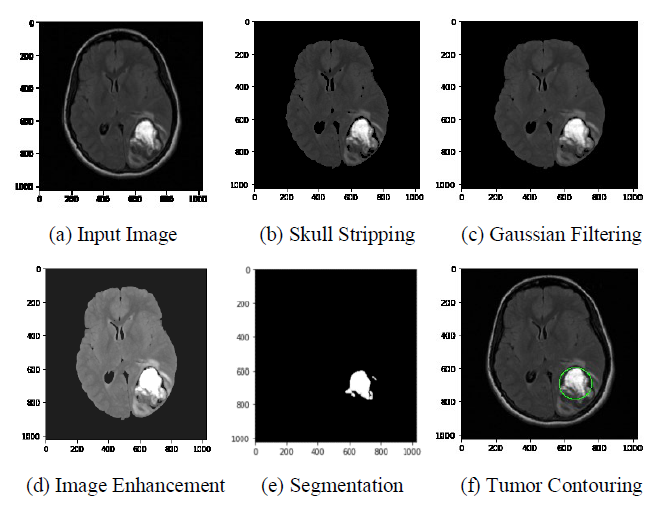

In [47]:
from google.colab.patches import cv2_imshow
def thresholding(img):
    ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
    ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
    ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
    ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
    ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()


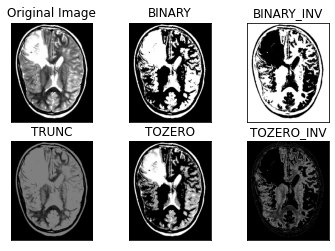

In [67]:
img_y = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes/y0.jpg')
thresholding(img_y)

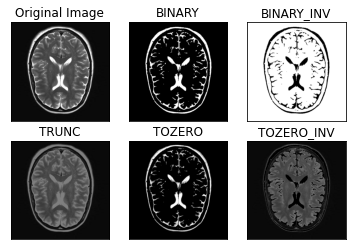

In [68]:
img_n = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/no/No12.jpg')
thresholding(img_n)

In [9]:
def abc(img):
  import cv2

  # Load image, grayscale, Gaussian blur, and Otsu's threshold
  image = img
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

  # Find contours and sort using contour area
  cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = cnts[0] if len(cnts) == 2 else cnts[1]
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
  for c in cnts:
      # Highlight largest contour
      cv2.drawContours(image, [c], -1, (36,255,12), 3)
      break

  cv2_imshow(thresh)
  cv2_imshow(image)

In [107]:
# skull stripping using otsu thresholding and connected component analysis to extract brain region.
def otsu_thresholding(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # ret, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # ret, thresh1 = cv2.threshold(img, 10, 255,cv2.THRESH_BINARY)
    thresh1 = img
    # cv2.imtools(thresh1)
    # print('img after thresholding')
    # cv2_imshow(thresh1)
        # thresh1 = img
        # analysis = cv2.connectedComponentsWithStats(thresh1, 4, cv2.CV_32S)
        # cnts = cv2.findContours(thresh1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        # cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        # cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        # for c in cnts:
        #     # Highlight largest contour
        #     cv2.drawContours(img, [c], -1, (36,255,12), 3)
        #     break
        # cv2_imshow(thresh1)
    analysis = cv2.connectedComponentsWithStats(thresh1, 4, cv2.CV_32S)
    (totalLabels, label_ids, values, centroid) = analysis
    print(totalLabels)
    # print(label_ids)
    # print(values)
    # print(centroid)
    a = []
    output = np.zeros(img.shape, dtype="uint8")
    for i in range(1, totalLabels):
      area = values[i, cv2.CC_STAT_AREA]  
      a.append(area)
    print(sorted(a, reverse=True))
    m = max(a)
    print(m, len(a), totalLabels)
    for i in a:
      if (i >= 3):
          componentMask = (label_ids == i).astype("uint8") * 255
          output = cv2.bitwise_or(output, componentMask)
    cv2_imshow(output)
    output = output*img
    return output


img
57
[64128, 14, 11, 10, 8, 8, 8, 8, 7, 7, 7, 6, 6, 5, 5, 5, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
64128 56 57


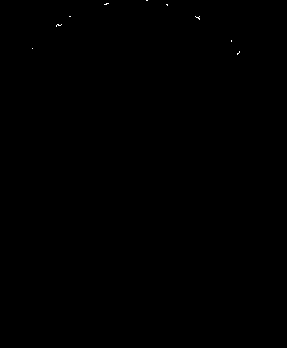

In [108]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes/y0.jpg')
print('img')
# cv2_imshow(img)
# abc(img)
kernel = None
img = otsu_thresholding(img_y)
# kernel = np.ones((5,5), np.uint8)  
# img = cv2.imread('/content/drive/MyDrive/Brain Tumor Detection/BRAIN_MRI_IMAGE_DATA_SET/data sets/yes/y0.jpg')
# img_erosion = cv2.erode(img, kernel, iterations=1)  
# img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)  
# print('img after otsu')
# cv2_imshow(img)
# print('erosion')
# cv2_imshow(img_erosion)
# print('dilation')  
# cv2_imshow(img_dilation)  
# count(img_dilation)
